In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the diabetic dataset
df =pd.read_csv('diabetic_data.csv')

In [3]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [6]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [7]:
initial_shape = df.shape

In [8]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [9]:
df_cleaned = df.drop_duplicates()

In [10]:
missing_values = df_cleaned.isnull().sum()

In [11]:
df_cleaned_replaced = df_cleaned.replace('?', pd.NA)

In [12]:
missing_after_replace = df_cleaned_replaced.isna().sum()

In [13]:
missing_percentage = (missing_after_replace / len(df_cleaned_replaced)) * 100

In [14]:
columns_to_drop = missing_percentage[missing_percentage > 40].index.tolist()
df_final = df_cleaned_replaced.drop(columns=columns_to_drop)

In [15]:
missing_summary = df_final.isna().sum()
missing_summary = missing_summary[missing_summary > 0].sort_values(ascending=False)
print(missing_summary)

payer_code    40256
race           2273
diag_3         1423
diag_2          358
diag_1           21
dtype: int64


In [16]:
final_shape = df_final.shape

In [17]:
(initial_shape, final_shape, columns_to_drop, missing_percentage.sort_values(ascending=False).head(10))

((101766, 50),
 (101766, 46),
 ['weight', 'medical_specialty', 'max_glu_serum', 'A1Cresult'],
 weight               96.858479
 max_glu_serum        94.746772
 A1Cresult            83.277322
 medical_specialty    49.082208
 payer_code           39.557416
 race                  2.233555
 diag_3                1.398306
 diag_2                0.351787
 diag_1                0.020636
 encounter_id          0.000000
 dtype: float64)

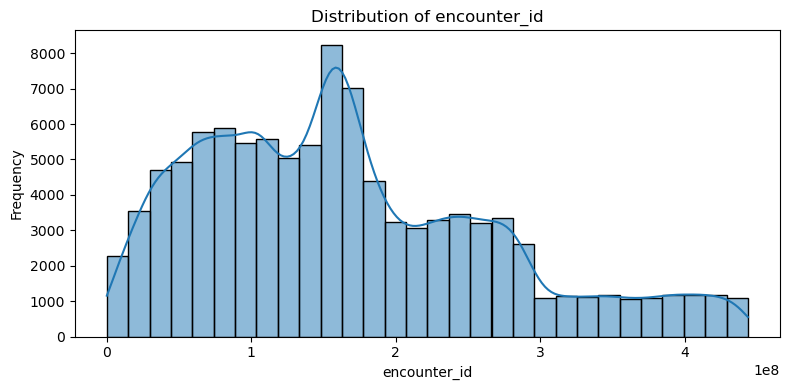

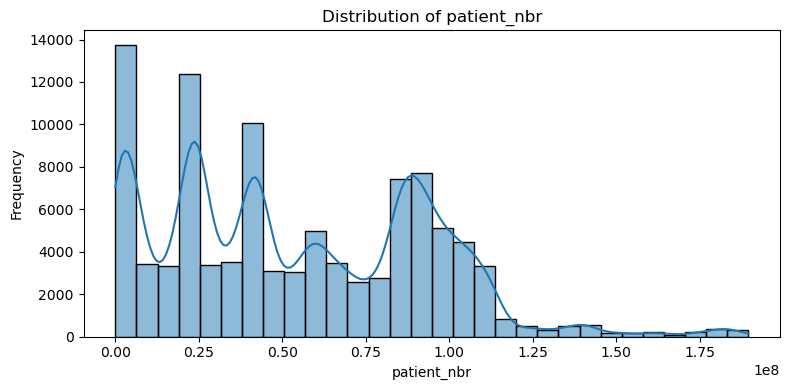

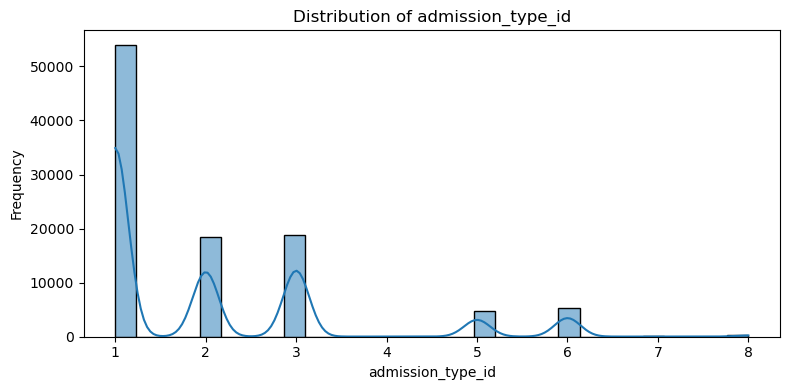

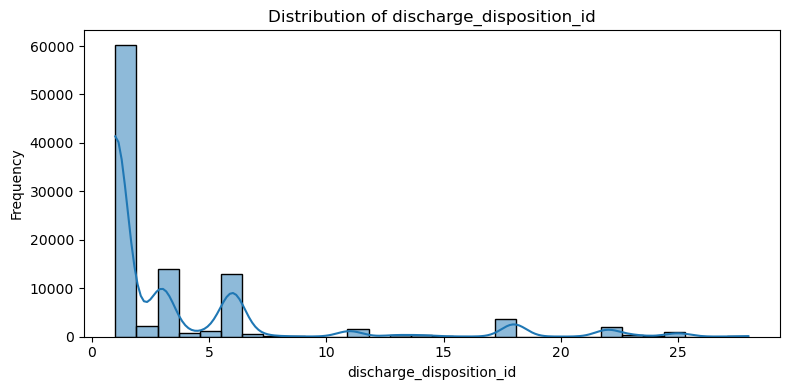

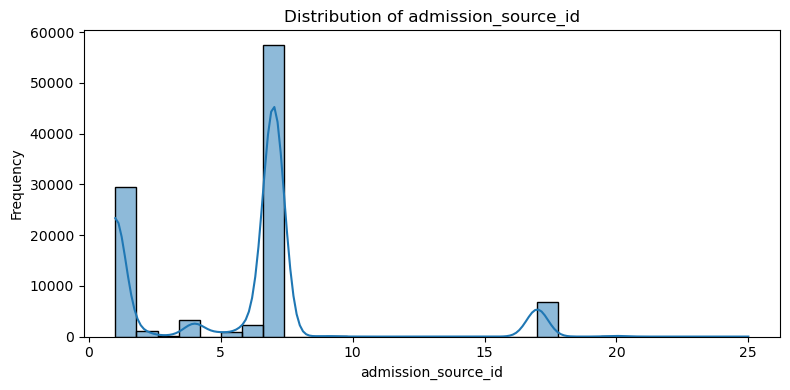

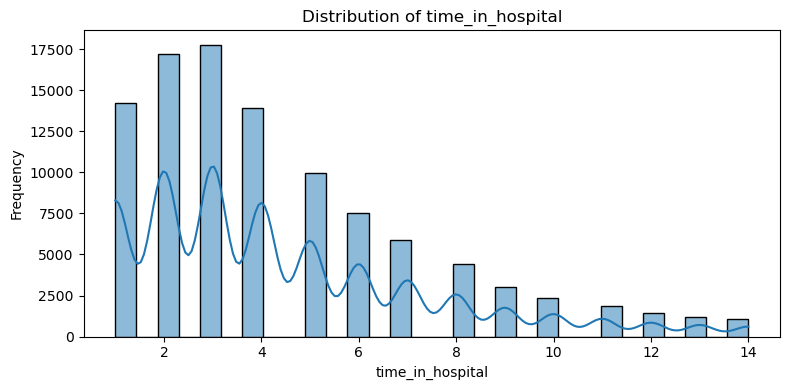

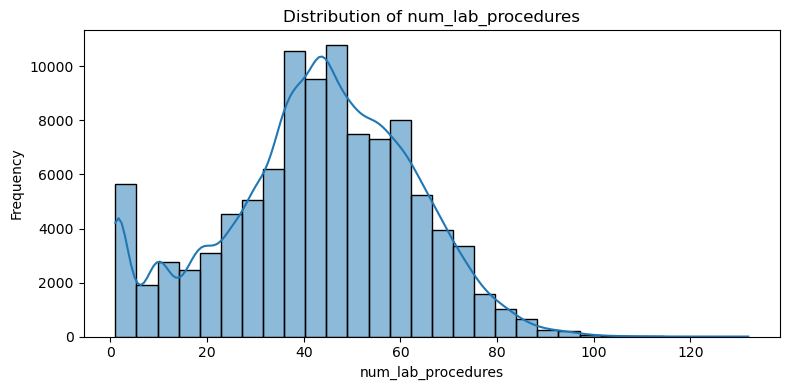

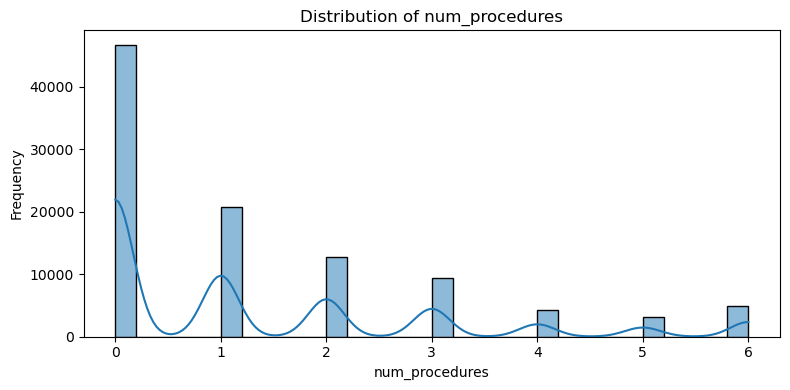

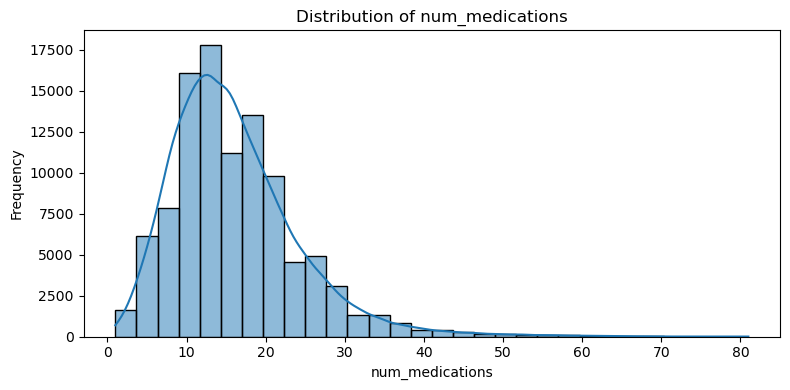

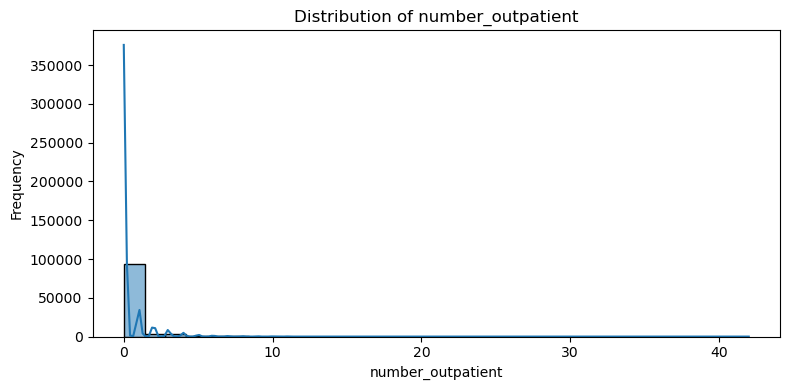

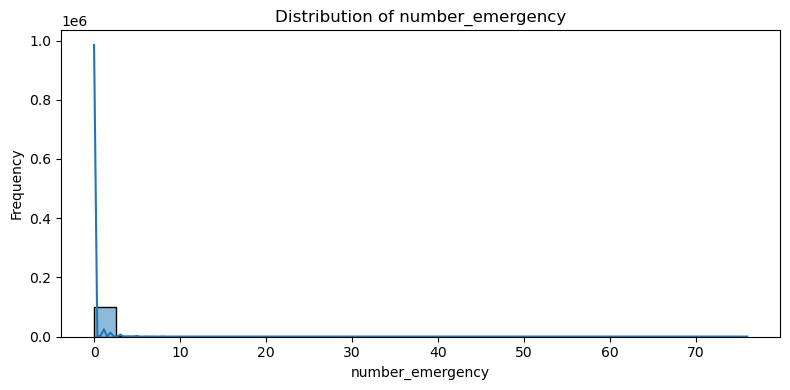

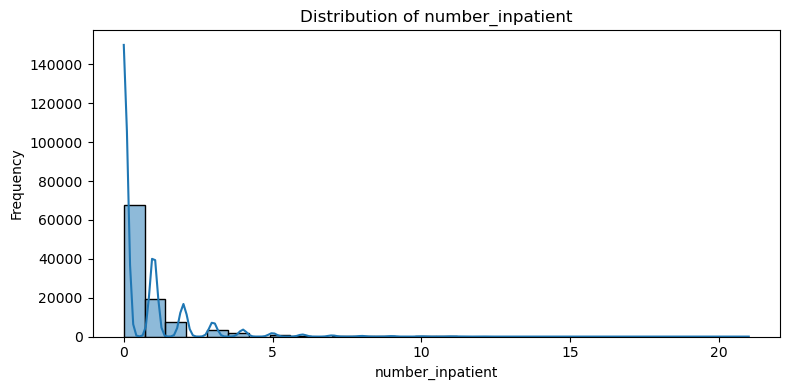

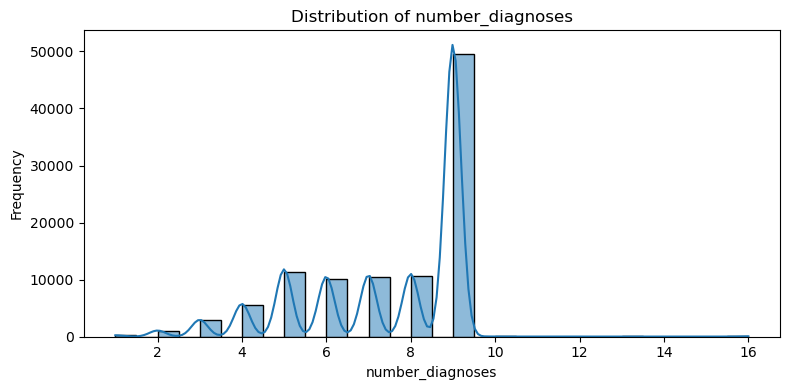

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Detect numerical columns for visualization
numerical_cols = df_final.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Set up basic visualization for numerical features (histograms + KDE)
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_final[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


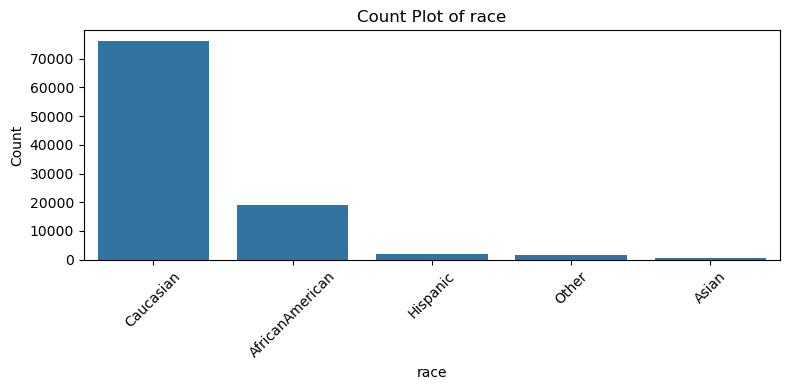

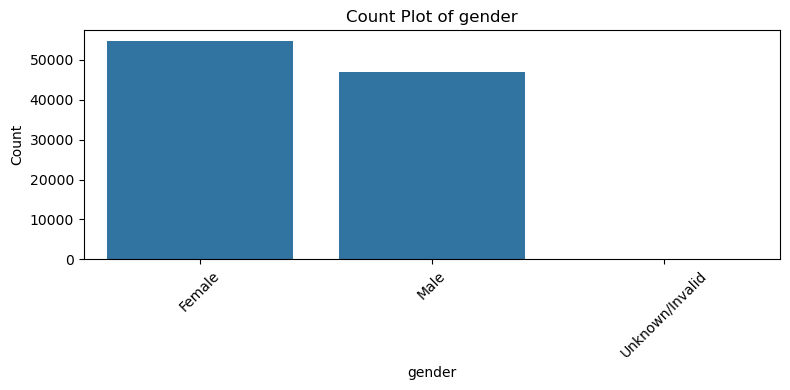

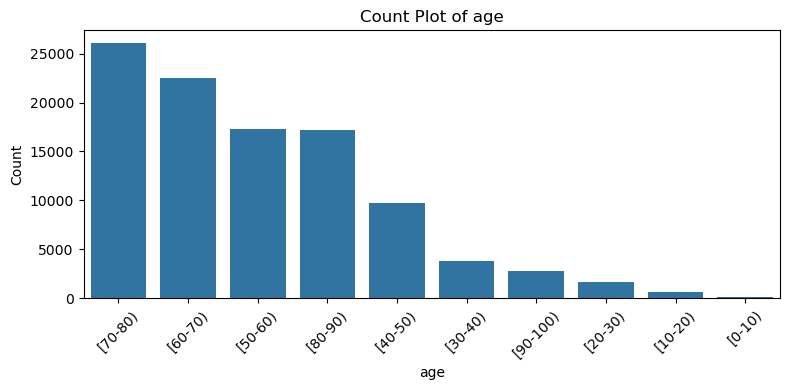

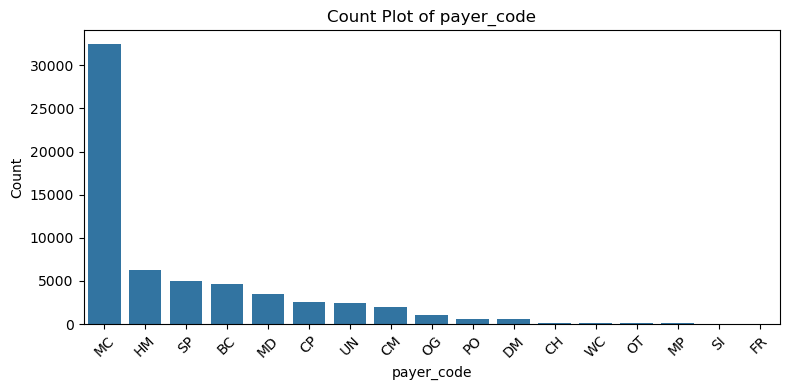

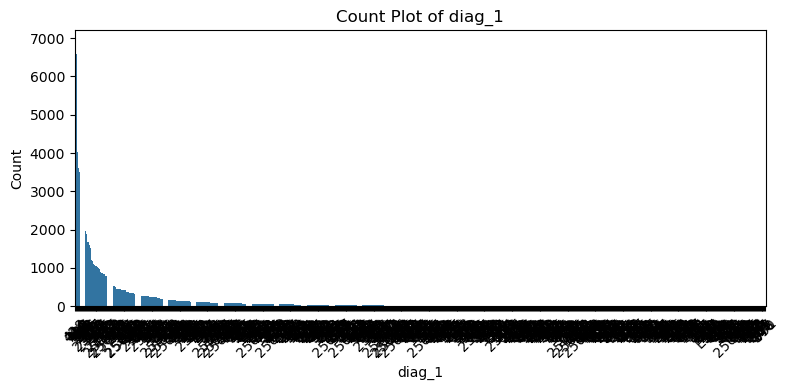

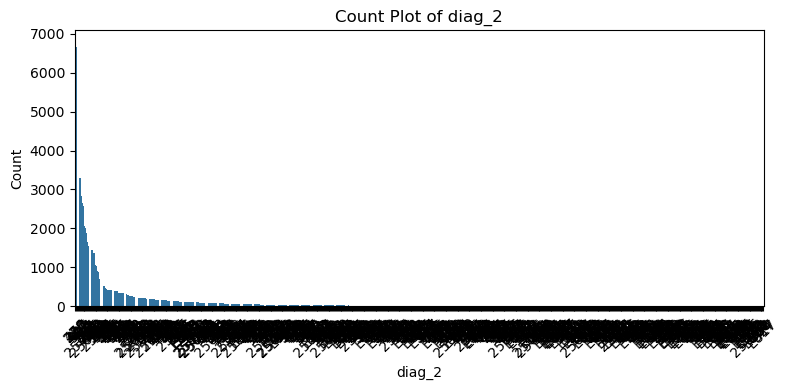

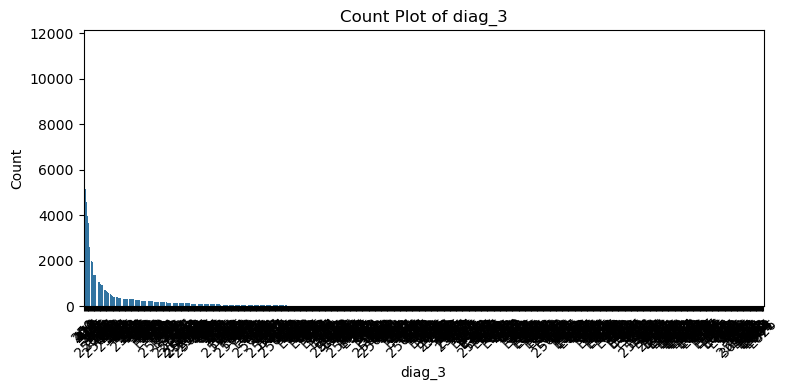

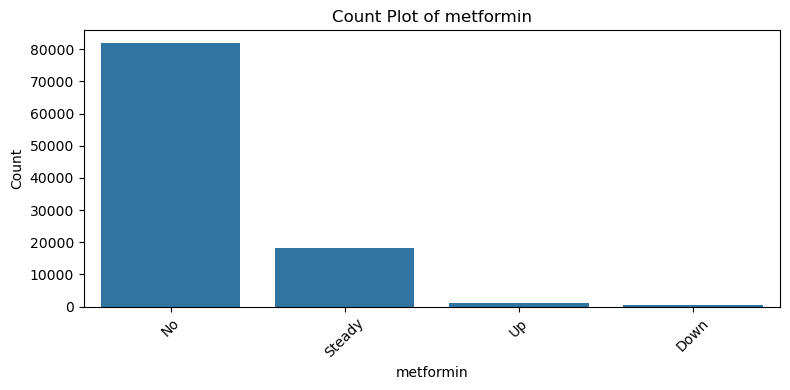

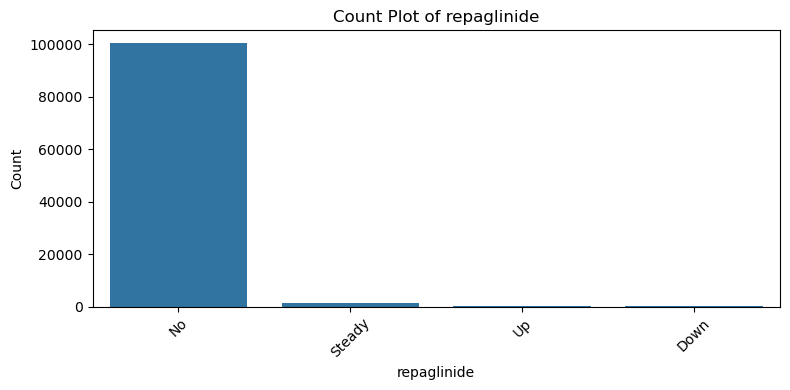

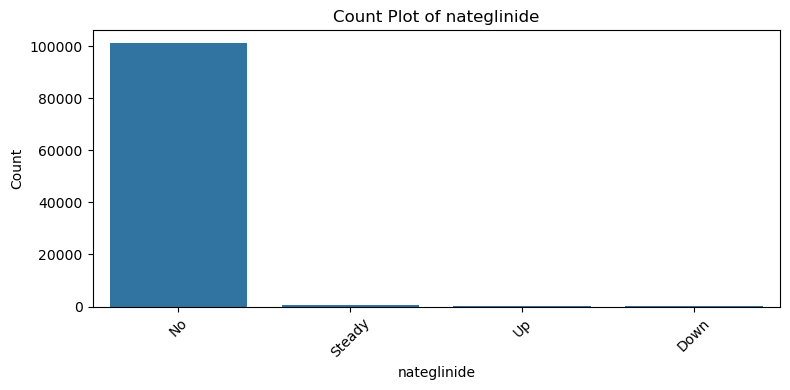

In [19]:
# Plot count plots for all categorical variables (top 10 for now to avoid clutter)
categorical_cols = df_final.select_dtypes(include=['object', 'category']).columns.tolist()

# Display top 10 most frequent categorical columns for EDA
top_categorical_cols = categorical_cols[:10]

# Plot count plots
for col in top_categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_final, x=col, order=df_final[col].value_counts().index)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

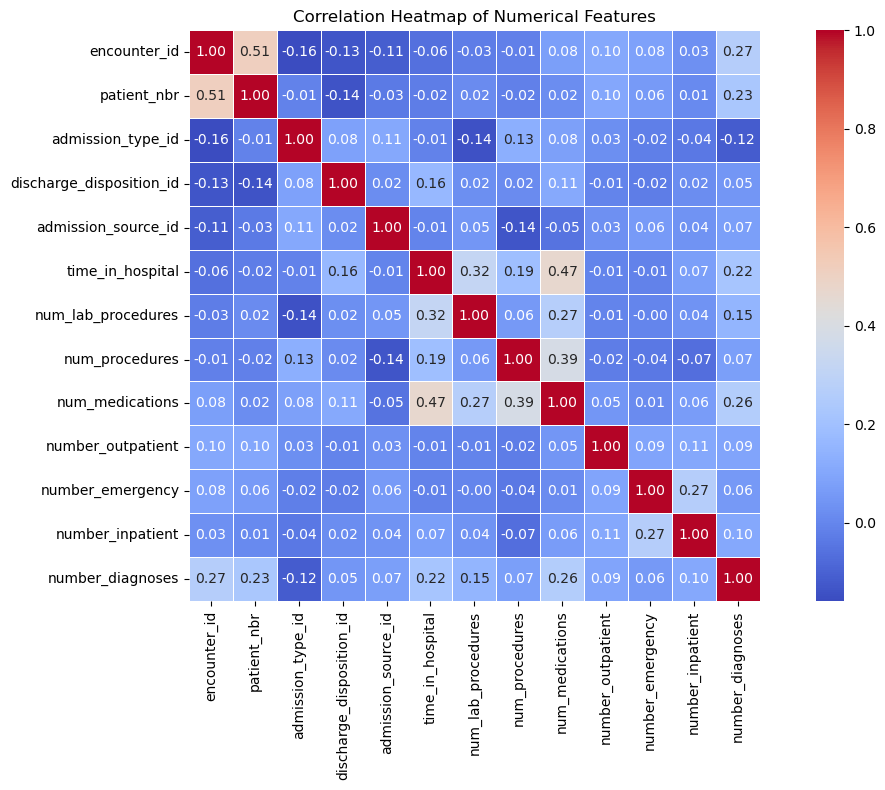

In [20]:
# Compute correlation matrix for numerical features
corr_matrix = df_final.select_dtypes(include=['int64', 'float64']).corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

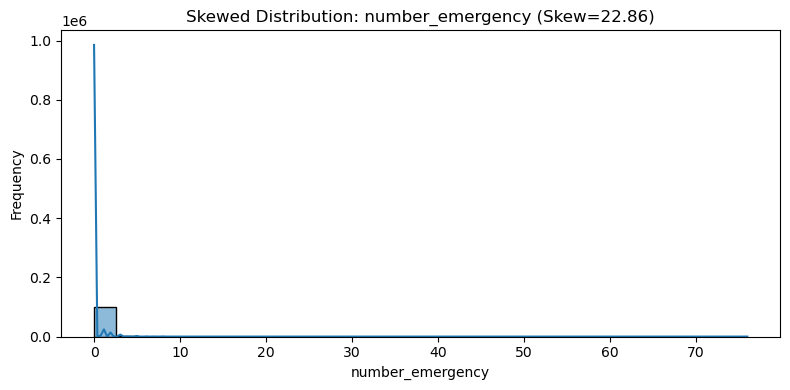

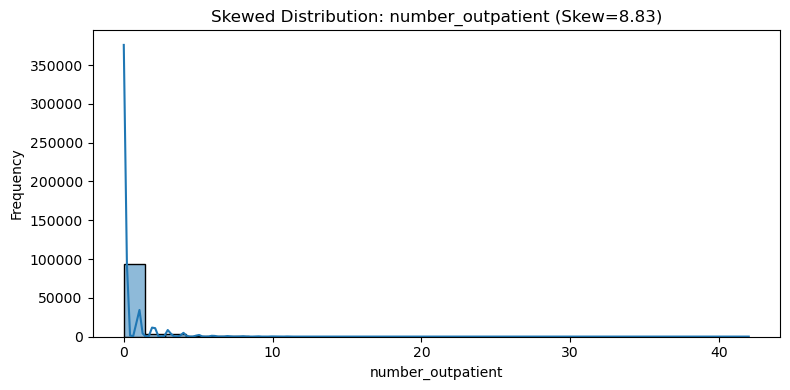

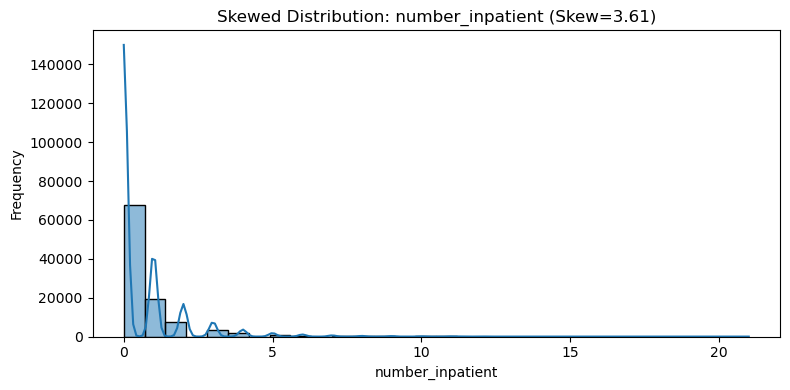

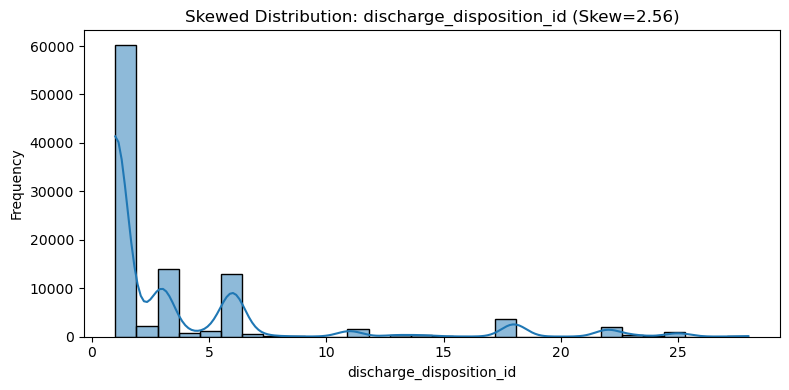

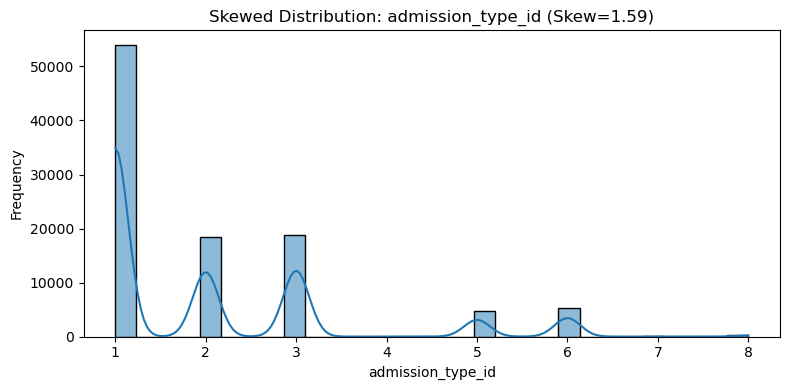

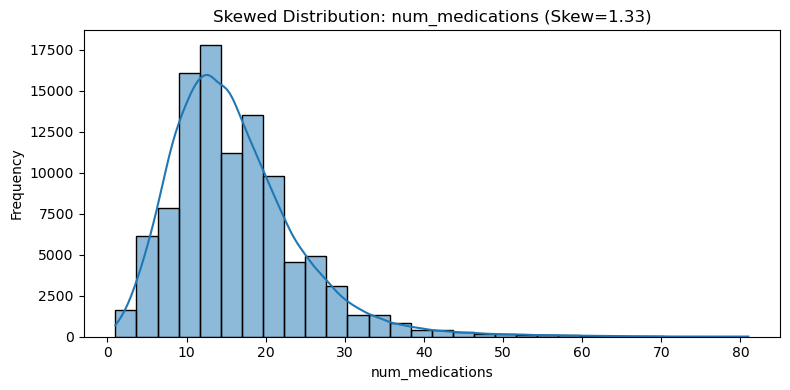

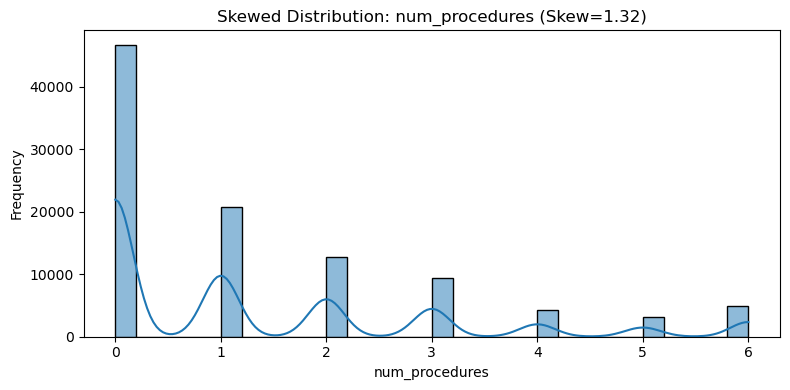

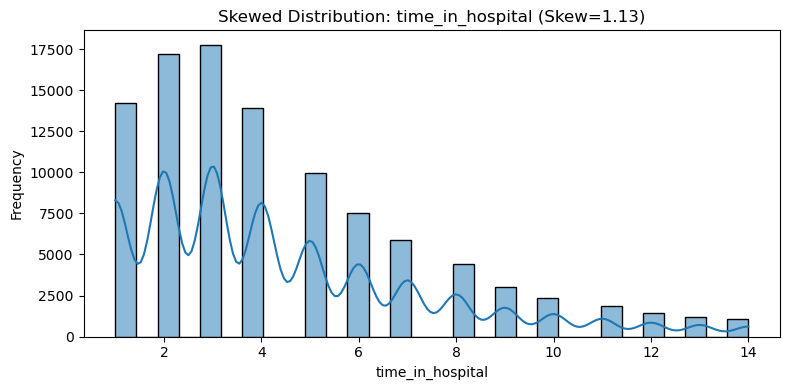

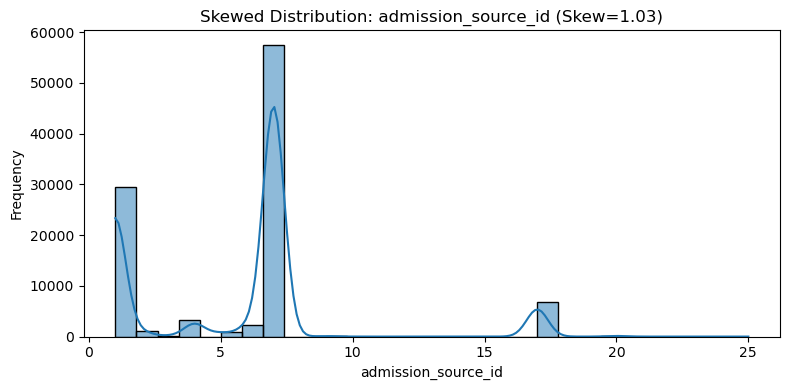

number_emergency            22.855582
number_outpatient            8.832959
number_inpatient             3.614139
discharge_disposition_id     2.563067
admission_type_id            1.591984
num_medications              1.326672
num_procedures               1.316415
time_in_hospital             1.133999
admission_source_id          1.029935
dtype: float64

In [21]:
# Compute skewness for numerical columns
skew_values = df_final.select_dtypes(include=['int64', 'float64']).skew().sort_values(ascending=False)

# Filter skewed features (commonly >1 or <-1 is considered highly skewed)
high_skew = skew_values[abs(skew_values) > 1]

# Plot histogram of the most skewed features
for col in high_skew.index:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_final[col], kde=True, bins=30)
    plt.title(f"Skewed Distribution: {col} (Skew={skew_values[col]:.2f})")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Show the most skewed features
high_skew

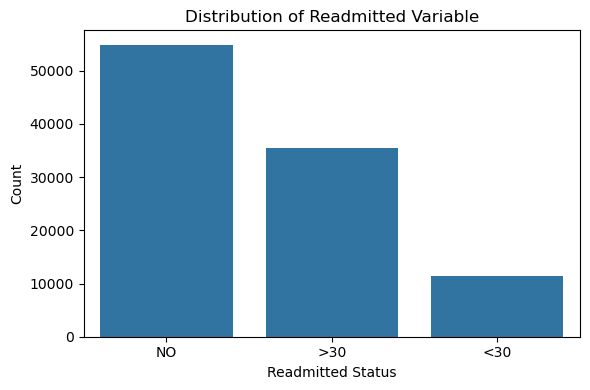

readmitted
NO     53.911916
>30    34.928169
<30    11.159916
Name: proportion, dtype: float64

In [22]:
# Plot the distribution of the target variable 'readmitted'
plt.figure(figsize=(6, 4))
sns.countplot(data=df_final, x='readmitted', order=df_final['readmitted'].value_counts().index)
plt.title("Distribution of Readmitted Variable")
plt.xlabel("Readmitted Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Show value counts
df_final['readmitted'].value_counts(normalize=True) * 100

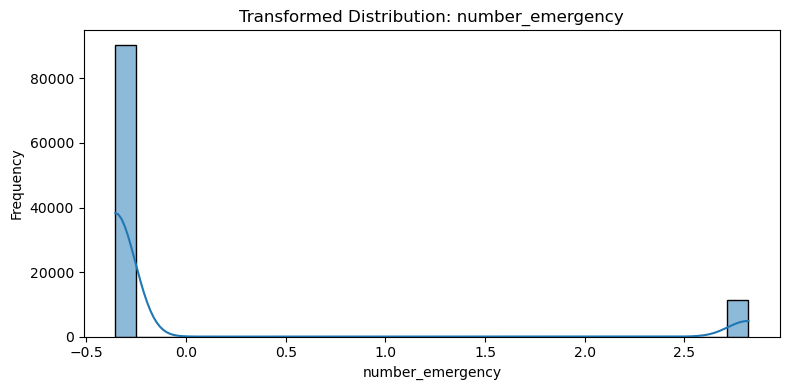

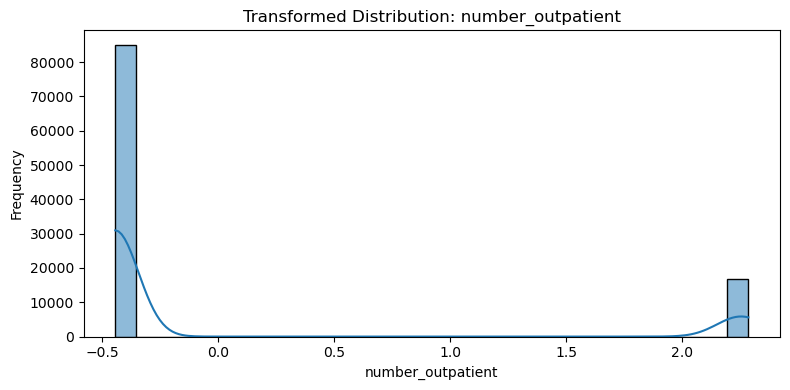

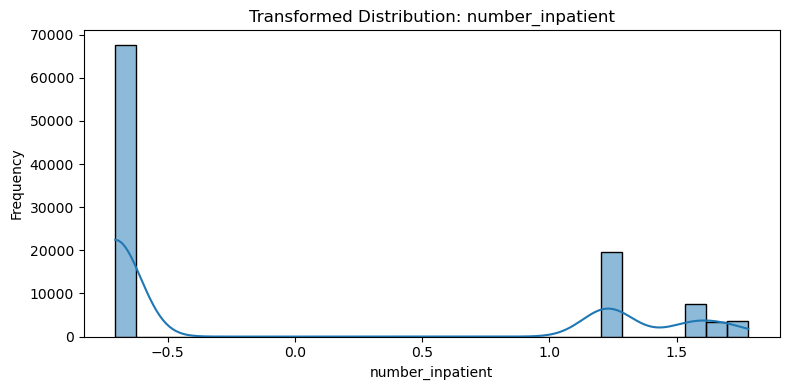

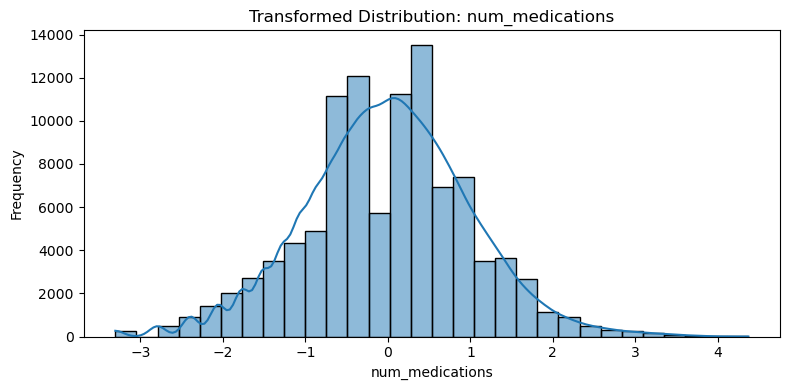

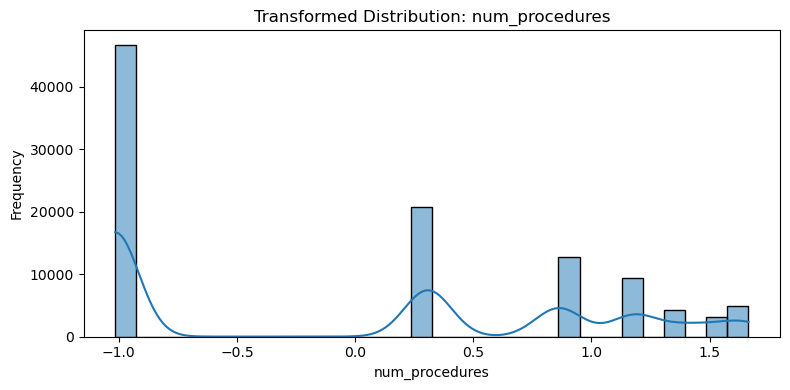

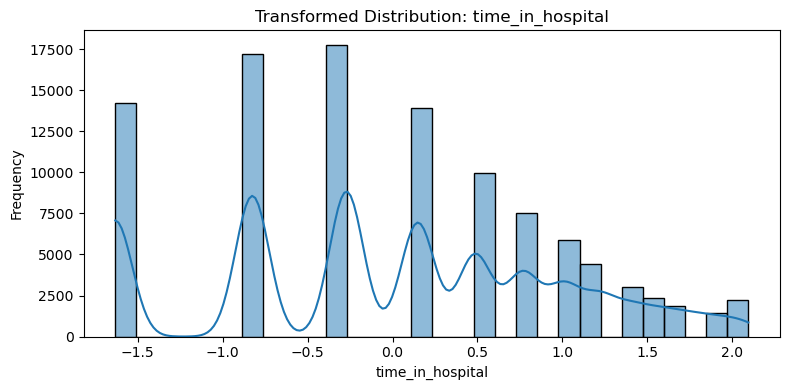

number_emergency     2.462986
number_outpatient    1.810634
number_inpatient     0.740986
num_procedures       0.207261
num_medications      0.018905
time_in_hospital     0.012906
dtype: float64

In [23]:
from sklearn.preprocessing import PowerTransformer

# Select highly skewed numerical columns (already identified)
skewed_columns = [
    'number_emergency', 'number_outpatient', 'number_inpatient',
    'num_medications', 'num_procedures', 'time_in_hospital'
]

# Apply Yeo-Johnson Power Transform (handles zero and negative values)
pt = PowerTransformer(method='yeo-johnson')
df_transformed = df_final.copy()
df_transformed[skewed_columns] = pt.fit_transform(df_transformed[skewed_columns])

# Recheck skewness after transformation
transformed_skewness = df_transformed[skewed_columns].skew().sort_values(ascending=False)

# Plot histograms again after transformation
for col in skewed_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_transformed[col], kde=True, bins=30)
    plt.title(f"Transformed Distribution: {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

transformed_skewness
